<a href="https://colab.research.google.com/github/keya-nandi/Project-1--Growth-Detective/blob/main/Project_1_Growth_Detective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Growth Detective**

This project analyzes economic growth and its determinants, using variables that help us understand better why different countries have different growth and development rates.

# **Part 1: Data Collection and Preparation**


In order to begin the analysis the first step was to narrow down the countries whose economic growth I wanted compare as well as research the different variables relevant to economic growth.

### **1.1 Country and Variable Selection**


In my analysis I chose to study the growth of 3 countrie at different stages of development:


1.   United States of America- Advanced economy with high GDP per capita
2.   India- Emerging economy with medium GDP levels but higher GDP growth
3.   Madagascar- Low-income economy with low GDP and low growth

I also chose the to look at 4 variables relevant to economic growth:

1.   GDP Per Capita
2.   Population Growth
3.   Foreign Direct Investment
4.   Life Expectancy at Birth

After making these preliminary decisions, I then moved onto the data collection part and followed the steps below.





### **1.2 Data Collection**

All the data was collected from World Bank's WDI package available in R, and spanning from 1980 to 2024, to maintain data integrity and standardize formatting. The steps to download the datasets are given below:

#### *- Install and load all required packages*

Before starting on the code, I installed and loaded all the required packages that were critical to the analyses. Following that, I went and downloaded each individual variable as a separate dataset before merging them into one standard dataset.

In [1]:
# install the following required packages
install.packages("WDI")
install.packages("zoo")
install.packages("purrr")
install.packages("ggplot2")

# load all the required packages
library(WDI)
library(dplyr)
library(purrr)
library(ggplot2)
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘S7’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




#### *- Download GDP Per Capita*

For this and the following variables, I downloaded the dataset directly from the WDI package on R, and filtered through the data to only include those from my 3 chosen countries, years, and indicators. I also did some preliminary data transformation by renaming all the variables for better understanding and removing the unnecessary columns.

In [2]:
# load GDP per capita data from World Bank WDI
GDP_Per_Capita <- WDI(country = c("USA", "IND", "MDG"), #select the country codes
                      indicator = "NY.GDP.PCAP.CD", # code for GDP per capita
                      start = 1980, end = 2024) %>% # data range
  rename(Country = country, # rename all the variables for better understanding
         Country_Code = iso2c,
         Year = year,
         GDP_per_capita = NY.GDP.PCAP.CD) %>%
  select(-contains("iso3c"))  # remove iso3c column

head(GDP_Per_Capita) # preview the data

,Country,Country_Code,Year,GDP_per_capita
,<chr>,<chr>,<int>,<dbl>
1,India,IN,2024,2696.664
2,India,IN,2023,2530.120
3,India,IN,2022,2347.448
4,India,IN,2021,2239.614
5,India,IN,2020,1907.043
6,India,IN,2019,2041.429


#### *- Download Population Growth*

In [3]:
# load population growth data from World Bank WDI
population_growth <- WDI(country = c("USA", "IND", "MDG"),  #select the country codes
                         indicator = "SP.POP.GROW",   # code for GDP per capita
                         start = 1980, end = 2024) %>%    # data range
  rename(Country = country,     # rename all the variables for better understanding
         Country_Code = iso2c,
         Year = year,
         Population_Growth = SP.POP.GROW) %>%
  select(-contains("iso3c")) # remove iso3c column

head(population_growth)    # preview the data


,Country,Country_Code,Year,Population_Growth
,<chr>,<chr>,<int>,<dbl>
1,India,IN,2024,0.8907065
2,India,IN,2023,0.8832895
3,India,IN,2022,0.7902005
4,India,IN,2021,0.8226482
5,India,IN,2020,0.9734386
6,India,IN,2019,1.0400140


#### *- Download Foreign Direct Investment*

In [4]:
# load FDI data from World Bank WDI
fdi_data <- WDI(country = c("USA", "IND", "MDG"),   # select the country codes
                indicator = "BX.KLT.DINV.CD.WD",    # code for foreign direct investment
                start = 1980, end = 2024) %>%   # data range
  rename(Country = country,       # rename all the variables for better understanding
         Country_Code = iso2c,
         Year = year,
         FDI_net_inflows = BX.KLT.DINV.CD.WD) %>%
  select(-contains("iso3c"))      # remove iso3c column

head(fdi_data)      # preview the data

,Country,Country_Code,Year,FDI_net_inflows
,<chr>,<chr>,<int>,<dbl>
1,India,IN,2024,27609339739
2,India,IN,2023,28078983530
3,India,IN,2022,49940258404
4,India,IN,2021,44727277563
5,India,IN,2020,64362364994
6,India,IN,2019,50610647354


#### *- Download Life expectancy at birth*

In [5]:
# load life expectancy data from World Bank WDI
life_exp <- WDI(country = c("USA", "IND", "MDG"), # select the country codes
                indicator = "SP.DYN.LE00.IN",   # code for life expectancy
                start = 1980, end = 2024) %>%   # data range
  rename(Country = country,            # rename all the variables for better understanding
         Country_Code = iso2c,
         Year = year,
         Life_Expectancy = SP.DYN.LE00.IN) %>%
  select(-contains("iso3c"))         # remove iso3c column

head(life_exp)      # preview the data


,Country,Country_Code,Year,Life_Expectancy
,<chr>,<chr>,<int>,<dbl>
1,India,IN,2024,NA
2,India,IN,2023,72.003
3,India,IN,2022,71.698
4,India,IN,2021,67.282
5,India,IN,2020,70.156
6,India,IN,2019,70.746


### **1.3 Data Cleaning**

Now that data has been collected, I then looked into doing some basic data cleaning by: merging the variable data into one table, checking for empty values, using linear forecasting to remedy the missing values and then rechecking if the data is clean following the steps below:

#### *- Merge the datasets*

Having all the data in one place aids easier comparison and helps present standardized data with no repetition.

In [6]:
# Merge datasets by Country and Year on all 4 chosen variables
growth_data <- GDP_Per_Capita %>%
  full_join(population_growth, by = c("Country", "Country_Code", "Year")) %>%
  full_join(fdi_data, by = c("Country", "Country_Code", "Year")) %>%
  full_join(life_exp, by = c("Country", "Country_Code", "Year"))


head(growth_data)       # preview the data


,Country,Country_Code,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,India,IN,2024,2696.664,0.8907065,27609339739,NA
2,India,IN,2023,2530.120,0.8832895,28078983530,72.003
3,India,IN,2022,2347.448,0.7902005,49940258404,71.698
4,India,IN,2021,2239.614,0.8226482,44727277563,67.282
5,India,IN,2020,1907.043,0.9734386,64362364994,70.156
6,India,IN,2019,2041.429,1.0400140,50610647354,70.746


#### *- Check for empty values*



Empty values typically give no answers or they might also give skewed answers, hence, it is very important to check for whether or not any of the cells are empty. Doing so, we easily notice that both FDI and life expectancy have some empty values which can be fixed in the next step.

In [7]:
colSums(is.na(growth_data))  # test for any empty columns

Country      Country_Code              Year    GDP_per_capita 
                0                 0                 0                 0 
Population_Growth   FDI_net_inflows   Life_Expectancy 
                0                 1                 3

#### *- Interpolation & forecasting using linear regression*

There are multiple ways to fix empty values in the datasets, but one of the most popular ways is interpolation. It allows you to estimate data in a particular cell by taking into account the data that already exists.

In [8]:
growth_data <- growth_data %>%
  group_by(Country) %>%      # Process each country separately
  arrange(Year, .by_group = TRUE) %>%       # Ensure data is sorted by year within each country
  mutate(
  # Interpolate missing GDP per capita using linear regression over years
    GDP_per_capita = ifelse(
      is.na(GDP_per_capita),
      predict(lm(GDP_per_capita ~ Year), newdata = data.frame(Year = Year)),
      GDP_per_capita
    ),
    # Interpolate missing Population Growth using linear regression
    Population_Growth = ifelse(
      is.na(Population_Growth),
      predict(lm(Population_Growth ~ Year), newdata = data.frame(Year = Year)),
      Population_Growth
    ),
    # Interpolate missing foreign direct investment inflows using linear regression
    FDI_net_inflows = ifelse(
      is.na(FDI_net_inflows),
      predict(lm(FDI_net_inflows ~ Year), newdata = data.frame(Year = Year)),
      FDI_net_inflows
    ),
    # Interpolate missing life expectancy at birth using linear regression
    Life_Expectancy = ifelse(
      is.na(Life_Expectancy),
      predict(lm(Life_Expectancy ~ Year), newdata = data.frame(Year = Year)),
      Life_Expectancy
    )
  ) %>%
  ungroup()          # Ungroup after operation

head(growth_data)       # preview the data

Country,Country_Code,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
India,IN,1980,271.0809,2.384826,79160000,53.593
India,IN,1981,274.9643,2.349732,91920000,54.173
India,IN,1982,278.6504,2.333970,72080000,54.735
India,IN,1983,295.9998,2.340694,5640000,55.283
India,IN,1984,281.0499,2.345933,19240000,55.813
India,IN,1985,300.9283,2.327054,106090000,56.324


#### *- Check for empty values again to make sure the interpolation was successful*

This step ensures that the interpolation was successful in completing our dataset to begin analysis. As you can see, now none of our data has any empty values.

In [9]:
colSums(is.na(growth_data))

Country      Country_Code              Year    GDP_per_capita 
                0                 0                 0                 0 
Population_Growth   FDI_net_inflows   Life_Expectancy 
                0                 0                 0

# **Part 2: Comparing Growth Across Countries**

In order to get a better look at the difference in growth rates, I then followed the below steps:

### **2.1 Calculate Growth Rates**

Compute annual GDP growth rate (%) using the formula:

(Current year GDP per capita - Previous year GDP per capita) / Previous year GDP per capita * 100

In [10]:
# Calculate annual GDP per capita growth rate
growth_data <- growth_data %>%
  group_by(Country) %>%         # Process each country separately
  arrange(Year, .by_group = TRUE) %>%        # Ensure data is sorted chronologically within each country
  mutate(
    GDP_growth_rate = (GDP_per_capita - lag(GDP_per_capita)) / lag(GDP_per_capita) * 100
  ) %>%
  ungroup()         # ungroup after computation

head(growth_data)    # preview the data



Country,Country_Code,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy,GDP_growth_rate
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,IN,1980,271.0809,2.384826,79160000,53.593,NA
India,IN,1981,274.9643,2.349732,91920000,54.173,1.432555
India,IN,1982,278.6504,2.333970,72080000,54.735,1.340556
India,IN,1983,295.9998,2.340694,5640000,55.283,6.226222
India,IN,1984,281.0499,2.345933,19240000,55.813,-5.050648
India,IN,1985,300.9283,2.327054,106090000,56.324,7.072905


### **2.2 Visualize growth**

#### *- Line Plot of GDP growth rates*

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`).”


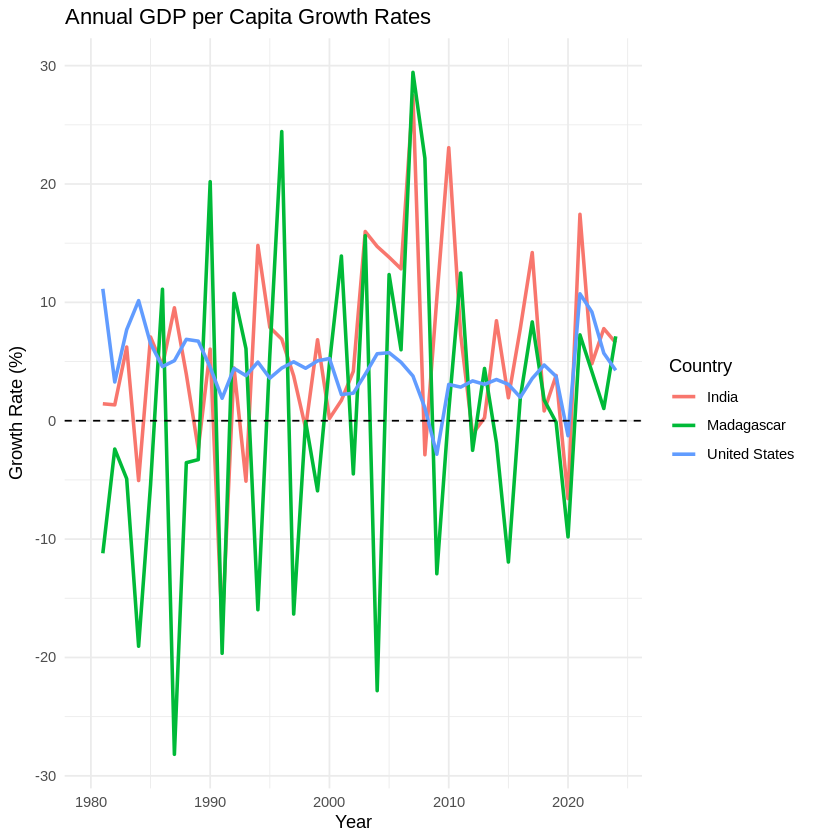

In [11]:
# Line plot of GDP growth rates
ggplot(growth_data, aes(x = Year, y = GDP_growth_rate, color = Country)) +        # Plot growth rate over time for each country as lines
  geom_line(size = 1) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +           # Add horizontal reference line at 0%
  labs(
    title = "Annual GDP per Capita Growth Rates",                  # Dashed line to indicate zero growth
    y = "Growth Rate (%)",
    x = "Year",
    color = "Country"
  ) +
  theme_minimal()


#### *- Line plot of GDP growth rate with 10 year moving average*

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_line()`).”


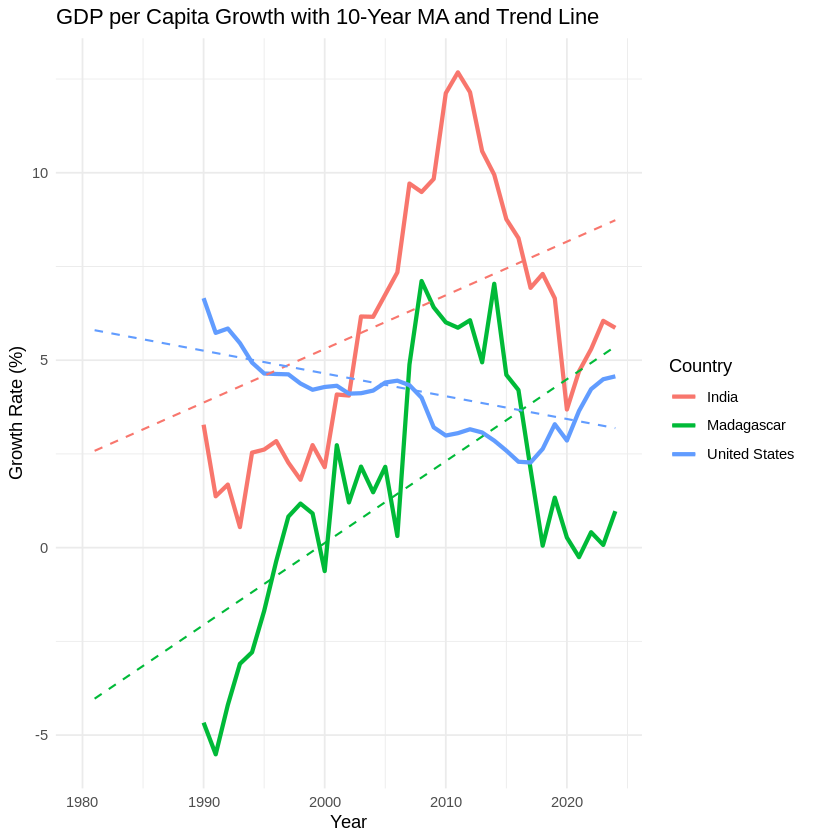

In [12]:
# Add 10-year moving average of GDP growth
growth_data <- growth_data %>%
  group_by(Country) %>%
  arrange(Year) %>%
  mutate(GDP_growth_MA10 = rollmean(GDP_growth_rate, k = 10, fill = NA, align = "right"))

# Plot GDP growth with moving average and trend line

ggplot(growth_data, aes(x = Year, y = GDP_growth_rate, color = Country)) +      # Plot smoothed 10-year moving average line
  geom_line(aes(y = GDP_growth_MA10), size = 1.2) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed", size = 0.6, alpha = 0.2) +     # Add linear trend line
  labs(
    title = "GDP per Capita Growth with 10-Year MA and Trend Line",
    y = "Growth Rate (%)",
    x = "Year",
    color = "Country"
  ) +
  theme_minimal()


#### *- Line plot of GDP per capita*


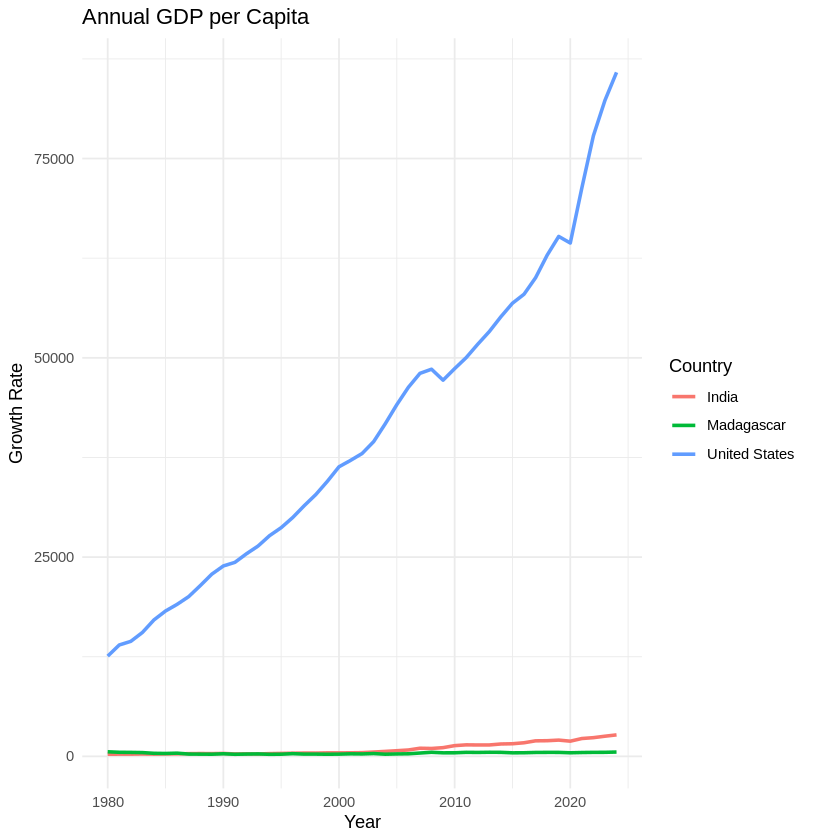

In [13]:
ggplot(growth_data, aes(x=Year, y=`GDP_per_capita`, color=Country)) +       # Plot GDP per capita over time as lines for each country
  geom_line(size=1) +
  labs(title="Annual GDP per Capita",
       x="Year",
       y="Growth Rate") +
  theme_minimal()

#### *- Line plot of gdp per capita (log scale)*

   Plot GDP per capita trajectories for each country and use log scale to better compare countries with large differences

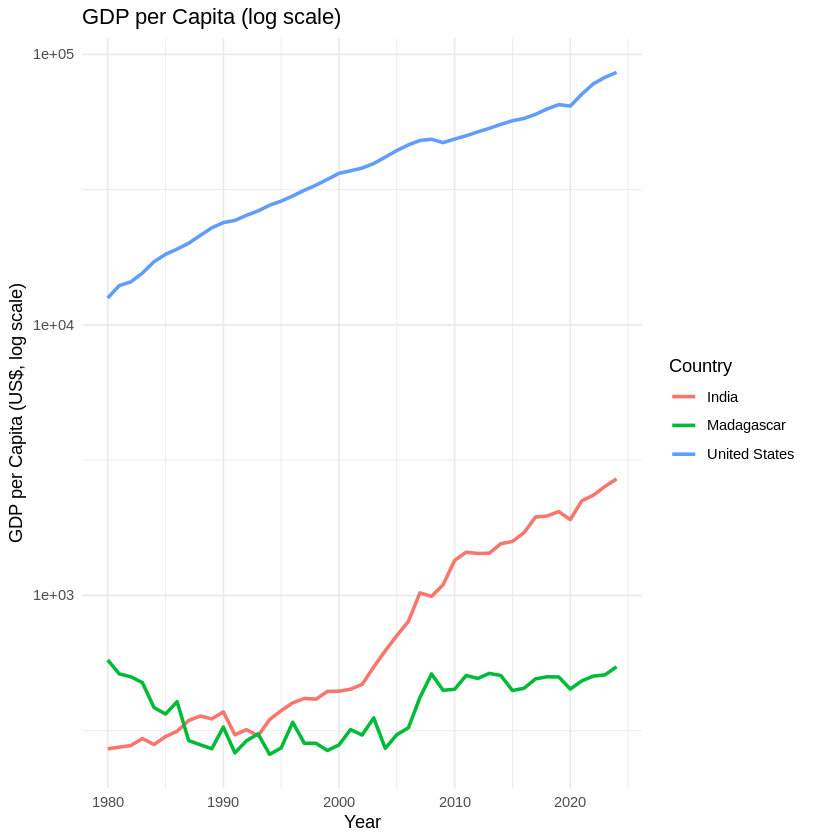

In [14]:
ggplot(growth_data, aes(x = Year, y = GDP_per_capita, color = Country)) +   #plot GDP per capita over time on log scale to compare
  geom_line(size = 1) +
  scale_y_log10() +
  labs(
    title = "GDP per Capita (log scale)",
    y = "GDP per Capita (US$, log scale)",
    x = "Year",
    color = "Country"
  ) +
  theme_minimal()


#### *- Graph of other variables*

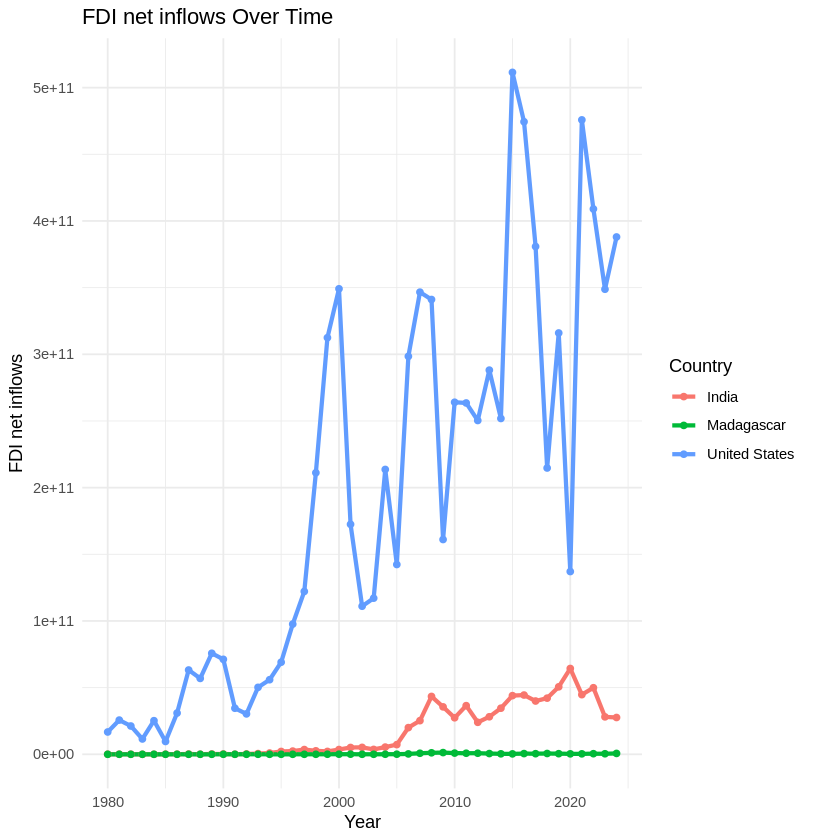

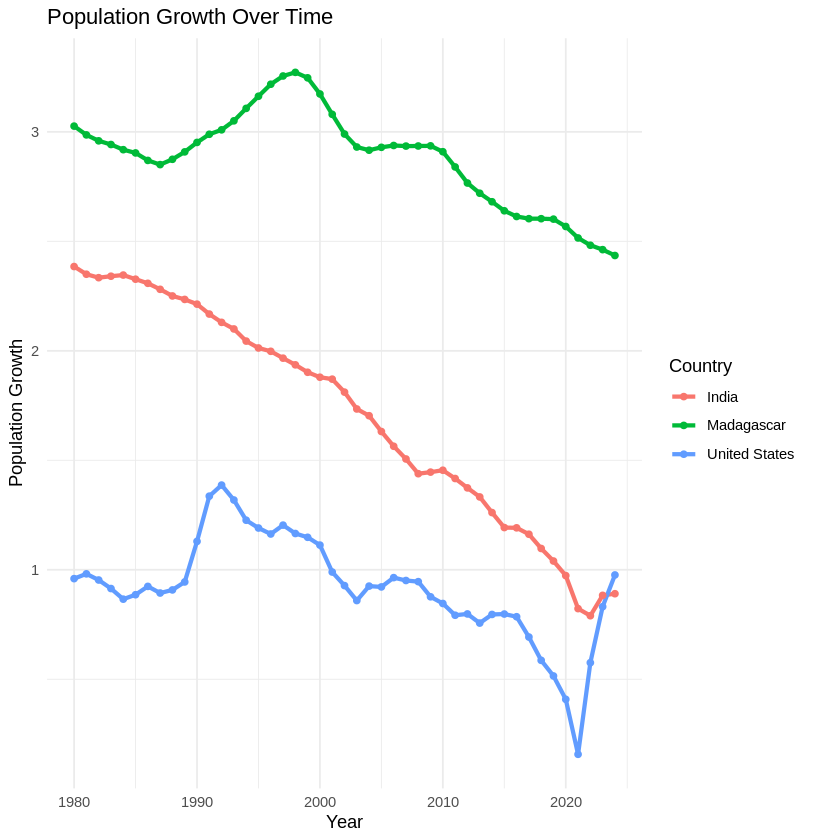

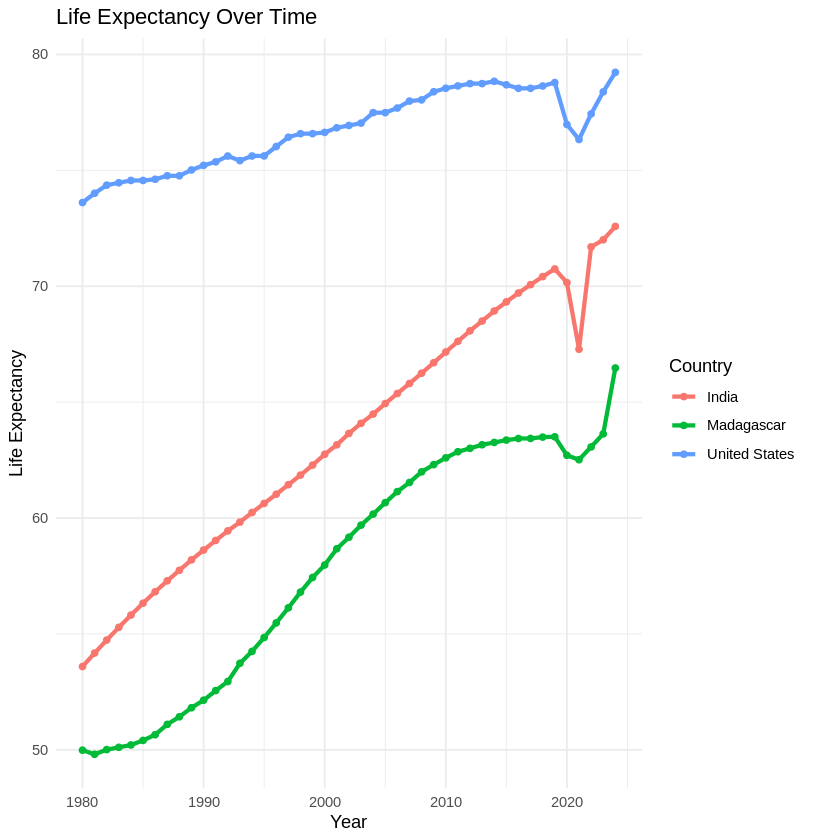

In [15]:
variables <- c("FDI_net_inflows", "Population_Growth", "Life_Expectancy") #plot graphs of population, fdi and life expectancy to compare with GDP growth

for (var in variables) {
  ggplot(growth_data, aes(x=Year, y=.data[[var]], color=Country)) +
    geom_line(size=1.2) +
    geom_point() +
    labs(title=paste(gsub("_"," ", var), "Over Time"),
         y=gsub("_"," ", var)) +
    theme_minimal() -> p
  print(p)
}

#### *- Checking for volatile growth*

In [16]:
# Print standard deviation (volatility) by country
growth_data %>%
  group_by(Country) %>%
  summarise(Volatility = sd(GDP_growth_rate, na.rm = TRUE)) %>%
  print()


# A tibble: 3 × 2
  Country       Volatility
  <chr>              <dbl>
1 India               8.01
2 Madagascar         12.7 
3 United States       2.67


# **Part 3: Growth changes in a particular country**

### **3.1 Choose one country**

For this part of the assignment, I chose to study India and divide the data into 3 distinct periods.

#### *- Filter the country*

In [17]:
# Filter the data for the particular country
India_data <- growth_data %>%
  filter(Country == "India")

head(India_data)

Country,Country_Code,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy,GDP_growth_rate,GDP_growth_MA10
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,IN,1980,271.0809,2.384826,79160000,53.593,NA,NA
India,IN,1981,274.9643,2.349732,91920000,54.173,1.432555,NA
India,IN,1982,278.6504,2.333970,72080000,54.735,1.340556,NA
India,IN,1983,295.9998,2.340694,5640000,55.283,6.226222,NA
India,IN,1984,281.0499,2.345933,19240000,55.813,-5.050648,NA
India,IN,1985,300.9283,2.327054,106090000,56.324,7.072905,NA


#### *- Define periods*

 Create a new column 'Period' to divide the data into specific time ranges. This helps analyze growth trends before and after key events

In [18]:
#divide the years into different periods
India_data <- India_data %>%
  mutate(Period = case_when(
    Year < 1990 ~ "pre-1990",
    Year >= 1990 & Year <= 2007 ~ "1990-2007",
    Year > 2007 ~ "2008-onward"
  ))

  head(India_data)

Country,Country_Code,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy,GDP_growth_rate,GDP_growth_MA10,Period
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
India,IN,1980,271.0809,2.384826,79160000,53.593,NA,NA,pre-1990
India,IN,1981,274.9643,2.349732,91920000,54.173,1.432555,NA,pre-1990
India,IN,1982,278.6504,2.333970,72080000,54.735,1.340556,NA,pre-1990
India,IN,1983,295.9998,2.340694,5640000,55.283,6.226222,NA,pre-1990
India,IN,1984,281.0499,2.345933,19240000,55.813,-5.050648,NA,pre-1990
India,IN,1985,300.9283,2.327054,106090000,56.324,7.072905,NA,pre-1990


### **3.2 Analyze growth trends**

#### *- Calculate average GDP growth for each period*

Compute the average GDP growth rate for each period. This will give a summary table showing how GDP growth changed across different historical periods

In [19]:
#calculate and find the average GDP growth per period
India_data %>%
  group_by(Period) %>%
  summarize(avg_growth = mean(GDP_growth_rate, na.rm = TRUE))


Period,avg_growth
<chr>,<dbl>
1990-2007,6.569029
2008-onward,6.116965
pre-1990,2.971140


#### *- Visualize growth trends*

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


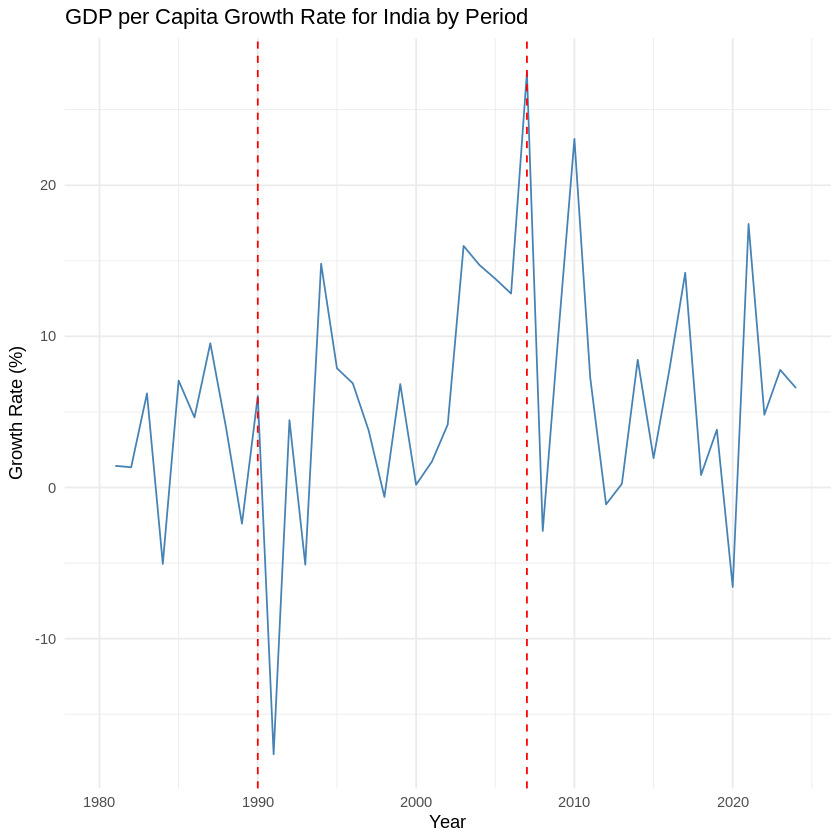

In [21]:
ggplot(India_data, aes(x = Year, y = GDP_growth_rate)) +
  geom_line(color = "steelblue") +          # Plot GDP growth trajectory as a blue line
  geom_vline(xintercept = c(1990, 2007), linetype = "dashed", color = "red") +         # Add vertical dashed lines to mark period boundaries
  labs(
    title = "GDP per Capita Growth Rate for India by Period",
    y = "Growth Rate (%)",
    x = "Year"
  ) +
  theme_minimal()

# **Part 4: Determinants of Growth**

### **4.1 Explore relationships**

I then aggregated and took the average of all OECD countries to expand my analysis.

#### *- Define variables and OECD countries*

In [22]:
# Define variables
indicators <- c(
  GDP_per_capita = "NY.GDP.PCAP.CD",
  Population_Growth = "SP.POP.GROW",
  FDI_net_inflows = "BX.KLT.DINV.CD.WD",
  Life_Expectancy = "SP.DYN.LE00.IN"
)

In [23]:
# Define OECD countries
oecd_countries <- c("AUT", "BEL", "CAN", "CHE", "DEU", "DNK", "ESP",
                    "FIN", "FRA", "GBR", "ITA", "JPN", "NLD", "NOR",
                    "SWE", "USA", "NZL")

#### *- Collect the Data*

In [24]:
#collect the data from the WDI package
oecd_data <- WDI(country = oecd_countries,
                 indicator = indicators,
                 start = 1980, end = 2024) %>%
  rename(Country = country, Year = year) %>%
  select(-iso3c)

head(oecd_data)


,Country,iso2c,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Austria,AT,1980,10826.972,0.0001059683,239300000,72.46341
2,Austria,AT,1981,9348.488,0.2550182314,327520000,72.81220
3,Austria,AT,1982,9373.488,0.0717170180,207920000,72.96098
4,Austria,AT,1983,9500.051,-0.1616009813,216120000,73.01220
5,Austria,AT,1984,8955.848,-0.0062949041,115240000,73.61220
6,Austria,AT,1985,9136.171,0.0469509679,169167935,73.81463


#### *- Check for missing values*

In [25]:
colSums(is.na(oecd_data))

Country             iso2c              Year    GDP_per_capita 
                0                 0                 0                 0 
Population_Growth   FDI_net_inflows   Life_Expectancy 
                1                 3                17

#### *- Interpolation & Forecasting*

In [26]:
# Linear interpolation per country
oecd_data <- oecd_data %>%
  group_by(Country) %>%
  arrange(Year, .by_group = TRUE) %>%
  group_modify(~ {
    df <- .x
    interpolate_lm <- function(y) {
      if (all(is.na(y))) return(y)
      model <- lm(y ~ df$Year, na.action = na.exclude)
      pred <- predict(model, newdata = data.frame(df$Year))
      y[is.na(y)] <- pred[is.na(y)]
      return(y)
    }
    df$GDP_per_capita <- interpolate_lm(df$GDP_per_capita)
    df$Population_Growth <- interpolate_lm(df$Population_Growth)
    df$FDI_net_inflows <- interpolate_lm(df$FDI_net_inflows)
    df$Life_Expectancy <- interpolate_lm(df$Life_Expectancy)
    return(df)
  }) %>%
  ungroup()

head(oecd_data)


Country,iso2c,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Austria,AT,1980,10826.972,0.0001059683,239300000,72.46341
Austria,AT,1981,9348.488,0.2550182314,327520000,72.81220
Austria,AT,1982,9373.488,0.0717170180,207920000,72.96098
Austria,AT,1983,9500.051,-0.1616009813,216120000,73.01220
Austria,AT,1984,8955.848,-0.0062949041,115240000,73.61220
Austria,AT,1985,9136.171,0.0469509679,169167935,73.81463


#### *- Recheck missing values*

In [27]:
colSums(is.na(oecd_data))

Country             iso2c              Year    GDP_per_capita 
                0                 0                 0                 0 
Population_Growth   FDI_net_inflows   Life_Expectancy 
                0                 0                 0

#### *- Compute annual GDP growth rate*

In [28]:
#Find annual GDP growth rate
oecd_data <- oecd_data %>%
  group_by(Country) %>%
  arrange(Year, .by_group = TRUE) %>%
  mutate(GDP_growth = (GDP_per_capita - lag(GDP_per_capita)) / lag(GDP_per_capita) * 100) %>%
  ungroup()

head(oecd_data)

Country,iso2c,Year,GDP_per_capita,Population_Growth,FDI_net_inflows,Life_Expectancy,GDP_growth
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Austria,AT,1980,10826.972,0.0001059683,239300000,72.46341,NA
Austria,AT,1981,9348.488,0.2550182314,327520000,72.81220,-13.6555588
Austria,AT,1982,9373.488,0.0717170180,207920000,72.96098,0.2674217
Austria,AT,1983,9500.051,-0.1616009813,216120000,73.01220,1.3502177
Austria,AT,1984,8955.848,-0.0062949041,115240000,73.61220,-5.7284159
Austria,AT,1985,9136.171,0.0469509679,169167935,73.81463,2.0134624


#### *- Aggregate by year instead of country*

In [29]:
#Find growth rate by year
aggregate_growth <- oecd_data %>%
  group_by(Year) %>%
  summarise(
    GDP_growth = mean(GDP_growth, na.rm = TRUE),
    Population_Growth = mean(Population_Growth, na.rm = TRUE),
    FDI_net_inflows = mean(FDI_net_inflows, na.rm = TRUE),
    Life_Expectancy = mean(Life_Expectancy, na.rm = TRUE)
  ) %>%
  ungroup()

head(aggregate_growth)

Year,GDP_growth,Population_Growth,FDI_net_inflows,Life_Expectancy
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1980,NaN,0.4287153,4117719562,74.30454
1981,-6.086813,0.4286732,3999980393,74.62986
1982,-3.090305,0.3963214,3566696905,74.92371
1983,-1.084164,0.3726100,1865088873,74.99338
1984,-1.608085,0.3332550,2351172721,75.35722
1985,4.239519,0.3438233,1620205793,75.33632


#### *- Plot Average GDP growth per capita*

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


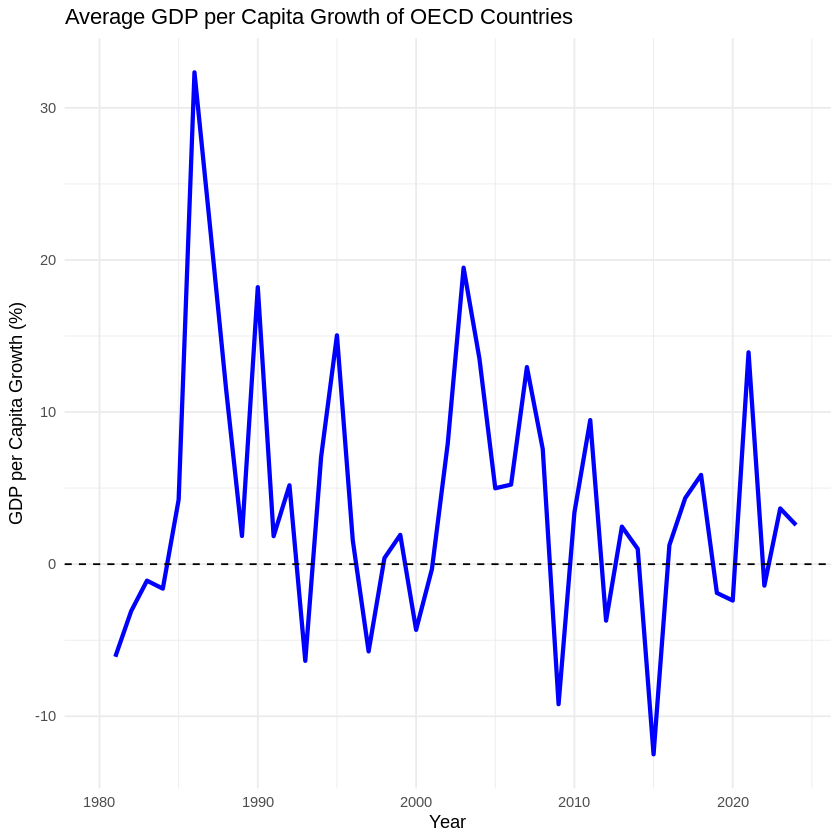

In [30]:
#Visualize GDP growth rates for all OECD countries
library(ggplot2)

ggplot(aggregate_growth, aes(x = Year, y = GDP_growth)) +
  geom_line(color = "blue", size = 1.2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Average GDP per Capita Growth of OECD Countries",
       x = "Year",
       y = "GDP per Capita Growth (%)") +
  theme_minimal()

#### *- Plot GDP growth rate vs population growth*

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


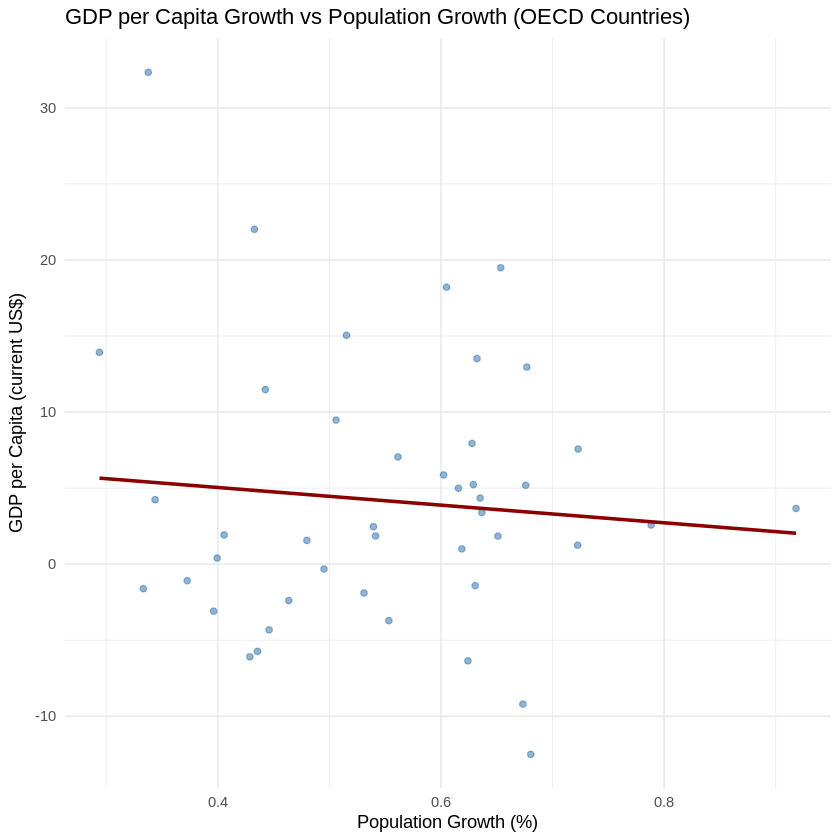

In [31]:
#Plot GDP growth rate vs population growth
ggplot(aggregate_growth, aes(x = Population_Growth, y = GDP_growth)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(
    title = "GDP per Capita Growth vs Population Growth (OECD Countries)",
    x = "Population Growth (%)",
    y = "GDP per Capita (current US$)"
  ) +
  theme_minimal()

#### *- Plot GDP growth vs FDI*

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


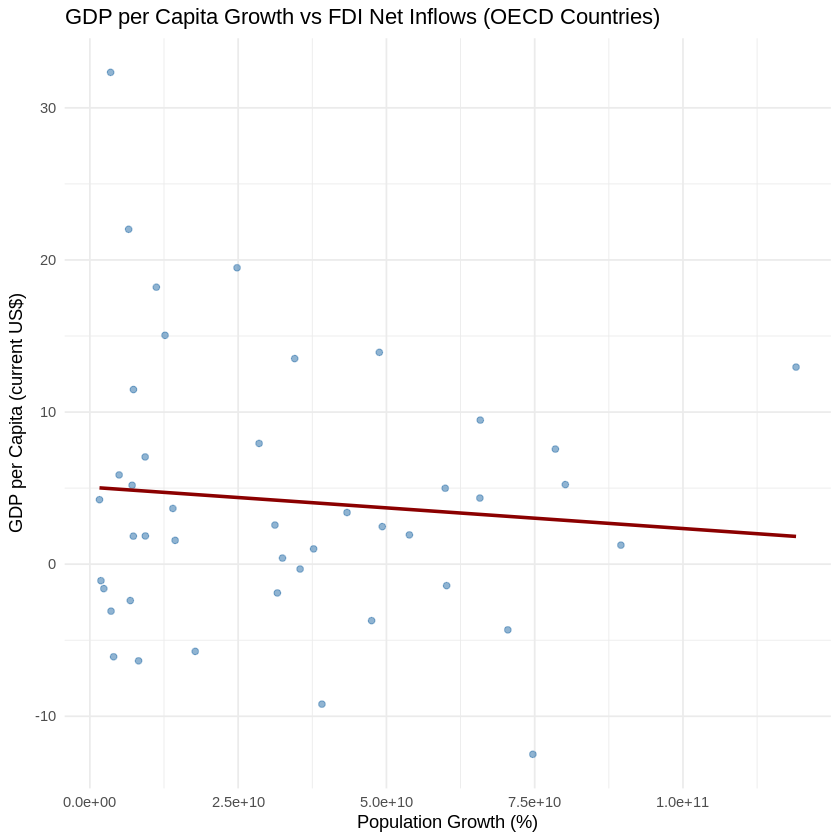

In [32]:
#plot GDP growth vs FDI
ggplot(aggregate_growth, aes(x = FDI_net_inflows, y = GDP_growth)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(
    title = "GDP per Capita Growth vs FDI Net Inflows (OECD Countries)",
    x = "Population Growth (%)",
    y = "GDP per Capita (current US$)"
  ) +
  theme_minimal()

#### *- Plot GDP vs Life Expectancy*

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


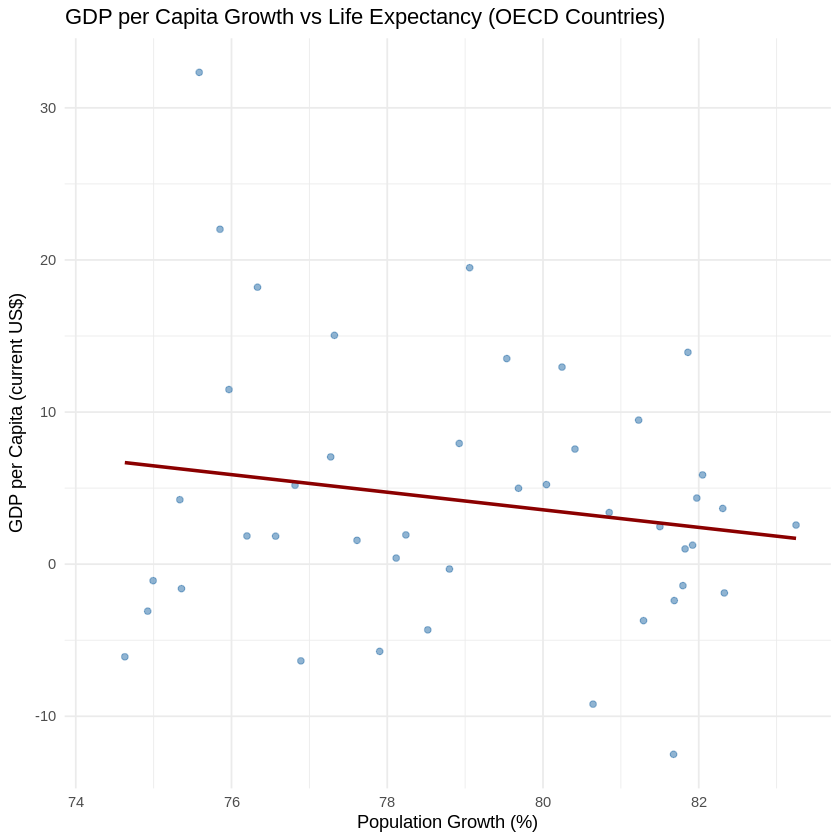

In [33]:
#Plot GDP vs life expectancy
ggplot(aggregate_growth, aes(x = Life_Expectancy, y = GDP_growth)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(
    title = "GDP per Capita Growth vs Life Expectancy (OECD Countries)",
    x = "Population Growth (%)",
    y = "GDP per Capita (current US$)"
  ) +
  theme_minimal()

#### *- Build and compare a Correlation matrix*

In [62]:
# Select only numeric columns for correlation
numeric_vars <- aggregate_growth %>%
  select(GDP_growth, Population_Growth, FDI_net_inflows, Life_Expectancy)

# Compute correlation matrix
cor_matrix <- cor(numeric_vars, use = "complete.obs")
cor_matrix


,GDP_growth,Population_Growth,FDI_net_inflows,Life_Expectancy
GDP_growth,1.00000000,-0.08981341,-0.09076428,-0.1704272
Population_Growth,-0.08981341,1.00000000,0.35537184,0.5593276
FDI_net_inflows,-0.09076428,0.35537184,1.00000000,0.6032885
Life_Expectancy,-0.17042722,0.55932764,0.60328851,1.0000000


#### *- Visualize a correlation matrix*

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




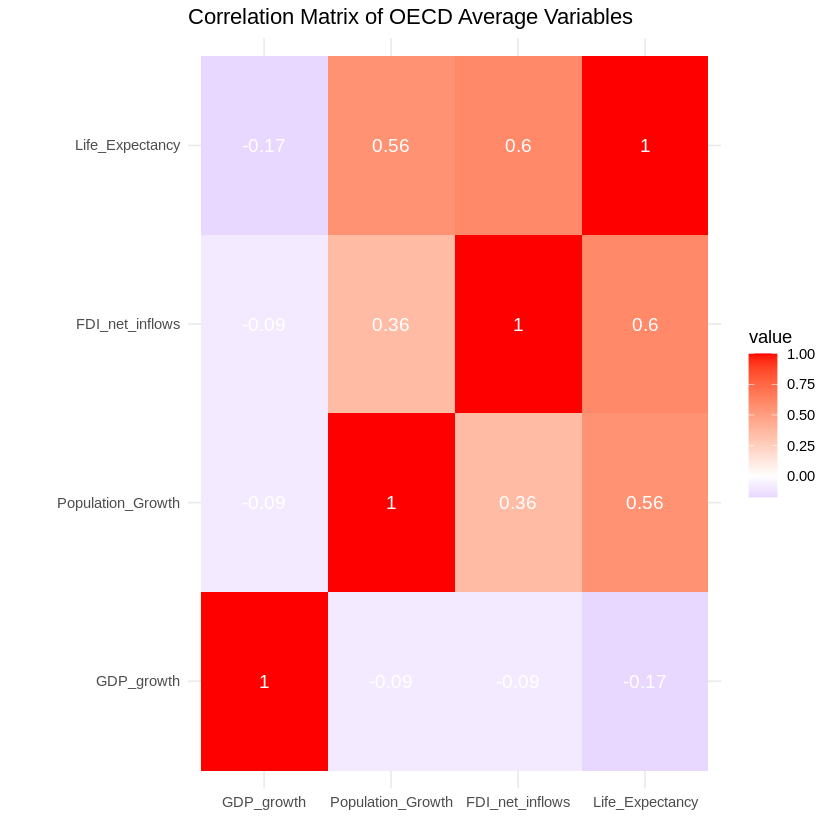

In [63]:
install.packages("reshape2")
library(ggplot2)
library(reshape2)

# Melt correlation matrix for ggplot
cor_melt <- melt(cor_matrix)

ggplot(cor_melt, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  geom_text(aes(label=round(value, 2)), color="white", size=4) +
  scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0) +
  labs(title="Correlation Matrix of OECD Average Variables",
       x="", y="") +
  theme_minimal()
